<h1>Data Analysis and Predictions on Fitness Survey : EDA | ML </h1>

<h2>Table of Content</h2>
<ul>
  <li>Introduction</li>
  <li>What to Expect?</li>
  <li>Overview of the Dataset</li>
  <li>Exploratory Data Analysis</li>
  <li>Data Preprocessing</li>
  <li>Model Training</li>
  <li>Predictions and Evaluation</li>
  <li>Recap & Key Insights</li>
</ul>

<h2>Introduction</h2>
<ul>
  <li>This fitness survey contains a wealth of information. Our goal is to use this data to analyze the impact of variables such as age, gender, and others on fitness equipment purchases. Additionally, we aim to use this dataset to predict whether a member will purchase fitness equipment or not.</li>
</ul>

<h2>What to Expect?</h2>
<ul>
  <li>Which age group has the highest percentage of fitness equipment purchases?</li>
  <li>Is there a difference in the percentage of fitness equipment purchases between genders?</li>
  <li>At what time do most people tend to exercise?</li>
</ul>

<h2>Overview of the Dataset</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Fitness Analysis(raw data).csv')
data.head()

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [3]:
# Data observation
print(data.shape)
print("\n")
print(data.info())
print("\n")
missing_values = data.isnull().sum()
print(missing_values)
print("\n")
has_duplicates = data.duplicated().any()  
print("Are there duplicate entries?：", has_duplicates)

(545, 18)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                              545 non-null    object
 1   Your name                                                                                                              545 non-null    object
 2   Your gender                                                                                                            545 non-null    object
 3   Your age                                                                                                               545 non-null    object
 

<h3>Check the unique value in each columns</h3>

In [4]:
unique_counts = data.nunique()
print(unique_counts)

Timestamp                                                                                                                545
Your name                                                                                                                517
Your gender                                                                                                                2
Your age                                                                                                                   5
How important is exercise to you ?                                                                                         5
How do you describe your current level of fitness ?                                                                        5
How often do you exercise?                                                                                                 6
What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)               44


<h3>Let's check the columns that include a large amount of unique values</h3>

In [5]:
data['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'].unique()

array(["I don't have enough time;I can't stay motivated",
       "I don't have enough time;I'll become too tired",
       "I can't stay motivated", "I don't have enough time",
       'I exercise regularly with no barriers',
       "I don't really enjoy exercising",
       "I can't stay motivated;I don't really enjoy exercising",
       "I don't have enough time;I can't stay motivated;I'll become too tired;I don't really enjoy exercising",
       "I don't have enough time;I exercise regularly with no barriers",
       "I don't have enough time;I can't stay motivated;I'll become too tired;Less stamina",
       "I don't have enough time;I'll become too tired;I have an injury",
       "I don't have enough time;I'll become too tired;I don't really enjoy exercising",
       "I'll become too tired",
       "I don't have enough time;I can't stay motivated;I'll become too tired;I have an injury",
       "I'll become too tired;I don't really enjoy exercising",
       "I can't stay motivated;I'll

In [6]:
data['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'].unique()

array(["I don't really exercise", 'Walking or jogging;Swimming',
       'Walking or jogging', 'Walking or jogging;Gym;Lifting weights',
       'Walking or jogging;Yoga', 'Gym;Team sport', 'Gym',
       'Walking or jogging;Team sport',
       "Walking or jogging;I don't really exercise",
       'Walking or jogging;Gym', 'Team sport', 'Zumba dance', 'Yoga',
       'Walking or jogging;Gym;Lifting weights;Team sport',
       'Walking or jogging;Gym;Yoga;Lifting weights', 'Gym;Swimming',
       'Gym;Lifting weights;Team sport',
       'Walking or jogging;Swimming;Lifting weights',
       'Walking or jogging;Gym;Yoga',
       'Walking or jogging;Zumba dance;Team sport',
       'Walking or jogging;Zumba dance', 'Gym;Swimming;Lifting weights',
       "Team sport;I don't really exercise",
       'Walking or jogging;Lifting weights',
       'Walking or jogging;Yoga;Team sport', 'Swimming',
       'Gym;Lifting weights', 'Walking or jogging;Gym;Swimming',
       'Walking or jogging;Gym;Team sport'

In [7]:
data['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'].unique()

array(['Ease of access to fast food;Temptation and cravings',
       'Temptation and cravings', 'Ease of access to fast food',
       'Lack of time', 'Cost;Ease of access to fast food',
       'Lack of time;Ease of access to fast food',
       'Lack of time;Temptation and cravings', 'Cost',
       'Lack of time;Cost',
       'Lack of time;Ease of access to fast food;Temptation and cravings',
       'Cost;Ease of access to fast food;Temptation and cravings',
       'Lack of time;Cost;Temptation and cravings',
       'Lack of time;Cost;Ease of access to fast food;Temptation and cravings',
       'Cost;Temptation and cravings', 'I have a balanced diet',
       "i don't have a proper diet",
       'Temptation and cravings;I have a balanced diet',
       'Rarely eat fast food',
       "I do not measure. I can't say for sure if my diet is balanced. ",
       'Alcohol does me a good diet',
       'Ease of access to fast food;I have a balanced diet',
       'Social circle '], dtype=object)

In [8]:
data['What motivates you to exercise?         (Please select all that applies )'].unique()

array(["I'm sorry ... I'm not really interested in exercising",
       "I want to be fit;I want to be flexible;I want to relieve stress;I'm sorry ... I'm not really interested in exercising",
       'I want to be fit', 'I want to be fit;I want to lose weight',
       'I want to be flexible',
       "I want to be fit;I'm sorry ... I'm not really interested in exercising",
       'I want to be fit;I want to increase muscle mass and strength;I want to lose weight',
       'I want to be fit;I want to lose weight;I want to relieve stress',
       'I want to be fit;I want to increase muscle mass and strength;I want to lose weight;I want to be flexible;I want to relieve stress;I want to achieve a sporting goal;Doing exercises prevents many diseases.So yeah saves a lot of money .',
       'I want to relieve stress',
       "I want to relieve stress;I'm sorry ... I'm not really interested in exercising",
       'I want to increase muscle mass and strength',
       'I want to be fit;I want to in

<h3>After analyzing the data, we removed unnecessary columns.</h3>

In [9]:
data = data.drop(columns=['Timestamp'])
data = data.drop(columns=['Your name '])
data = data.drop(columns=['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'])
data = data.drop(columns=['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'])
data = data.drop(columns=['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'])
data = data.drop(columns=['What motivates you to exercise?         (Please select all that applies )'])

In [10]:
print(data.shape)
print("\n")
unique_counts = data.nunique()
print(unique_counts)

(545, 12)


Your gender                                                            2
Your age                                                               5
How important is exercise to you ?                                     5
How do you describe your current level of fitness ?                    5
How often do you exercise?                                             6
Do you exercise ___________ ?                                          5
What time if the day do you prefer to exercise?                        3
How long do you spend exercising per day ?                             5
Would you say you eat a healthy balanced diet ?                        3
How healthy do you consider yourself?                                  5
Have you ever recommended your friends to follow a fitness routine?    2
Have you ever purchased a fitness equipment?                           2
dtype: int64


<h2>Summary</h2>
<ul>
  <li>Before data cleaning, the DataFrame contained 545 rows and 18 columns, with no missing values or duplicate entries.</li>
  <li>The DataFrame includes a mix of integer and object data types.</li>
  <li>All columns are categorical variables.</li>
  <li>After observing the data, we removed unnecessary columns because they were too messy for analysis.</li>
  <li>We now have a total of 545 rows and 12 columns in the DataFrame.</li>
</ul>

## Exploratory Data Analysis

#### Which age group has the highest percentage of fitness equipment purchases?

<Figure size 1500x500 with 0 Axes>

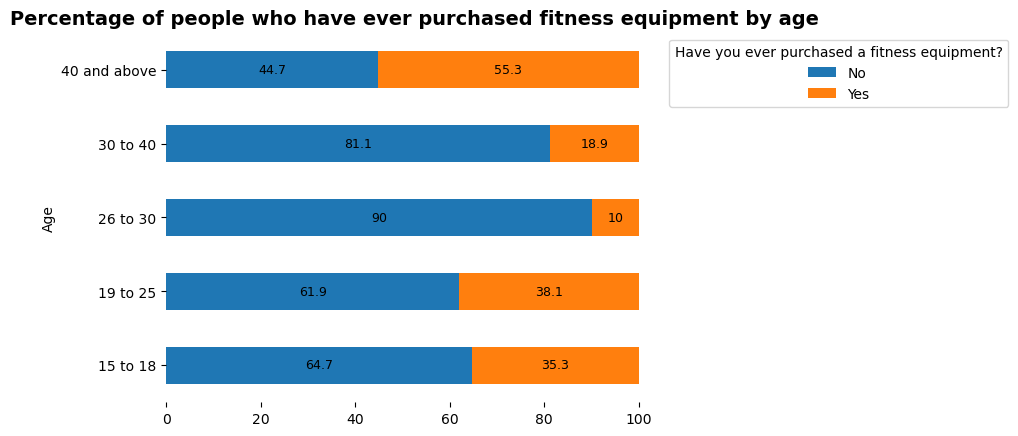

In [11]:
ct = round(pd.crosstab(data['Your age '], data['Have you ever purchased a fitness equipment?'], normalize='index') * 100,1)
plt.figure(figsize=(15, 5))

ax = ct.plot(kind='barh', stacked=True)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='black')
    
plt.ylabel('Age')
plt.xlabel("")
plt.title('Percentage of people who have ever purchased fitness equipment by age', size=14, weight="bold")
plt.legend(title='Have you ever purchased a fitness equipment?', labels=['No', 'Yes'], bbox_to_anchor=(1, 1))

sns.despine(left=True, bottom=True)

<h4 style="line-height: 1.5;">The above graph shows that people aged 40 and above have the highest percentage of fitness equipment purchases, at 55.3%, while those aged 26 to 30 have the lowest percentage, at 10%.</h4>

#### Is there a difference in the percentage of fitness equipment purchases between genders?

Text(0, 0.5, '')

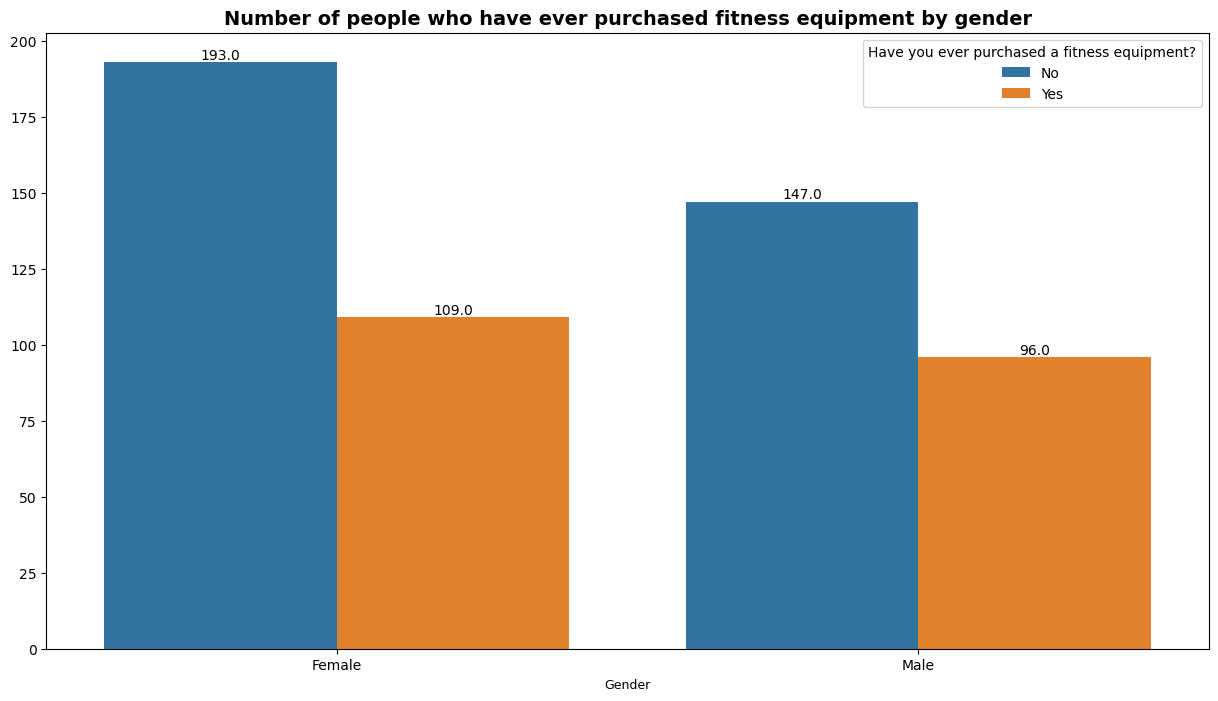

In [12]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x="Your gender ", hue="Have you ever purchased a fitness equipment?")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Number of people who have ever purchased fitness equipment by gender', size=14, weight="bold")
plt.xlabel('Gender', fontsize=9)
plt.ylabel('')

<h4 style="line-height: 1.5;">The above graph shows that, regardless of gender, the number of people who have never bought fitness equipment is higher than the number of those who have.</h4>

#### At what time do most people tend to exercise?

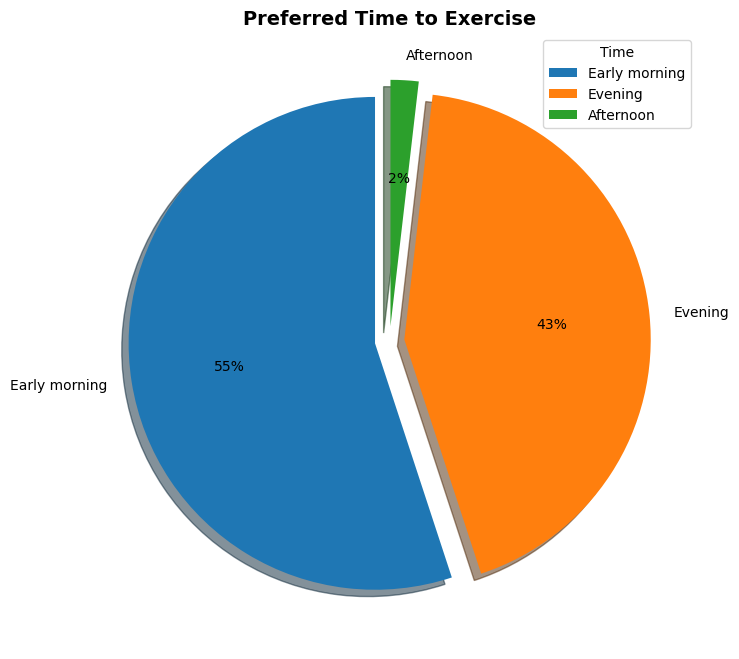

In [13]:
plt.figure(figsize=(15, 8))
times = data["What time if the day do you prefer to exercise?"].value_counts(normalize=True) * 100

plt.pie(times, labels=times.index, explode=(0.06, 0.06, 0.06), shadow=True, autopct='%1.0f%%', startangle=90)
plt.title("Preferred Time to Exercise", size=14, weight="bold")
plt.legend(title='Time', bbox_to_anchor=(1, 1))
plt.show()

<h4 style="line-height: 1.5;">The above graph shows that most people tend to exercise in the early morning, with 55% choosing this time.</h4>

Text(0, 0.5, '')

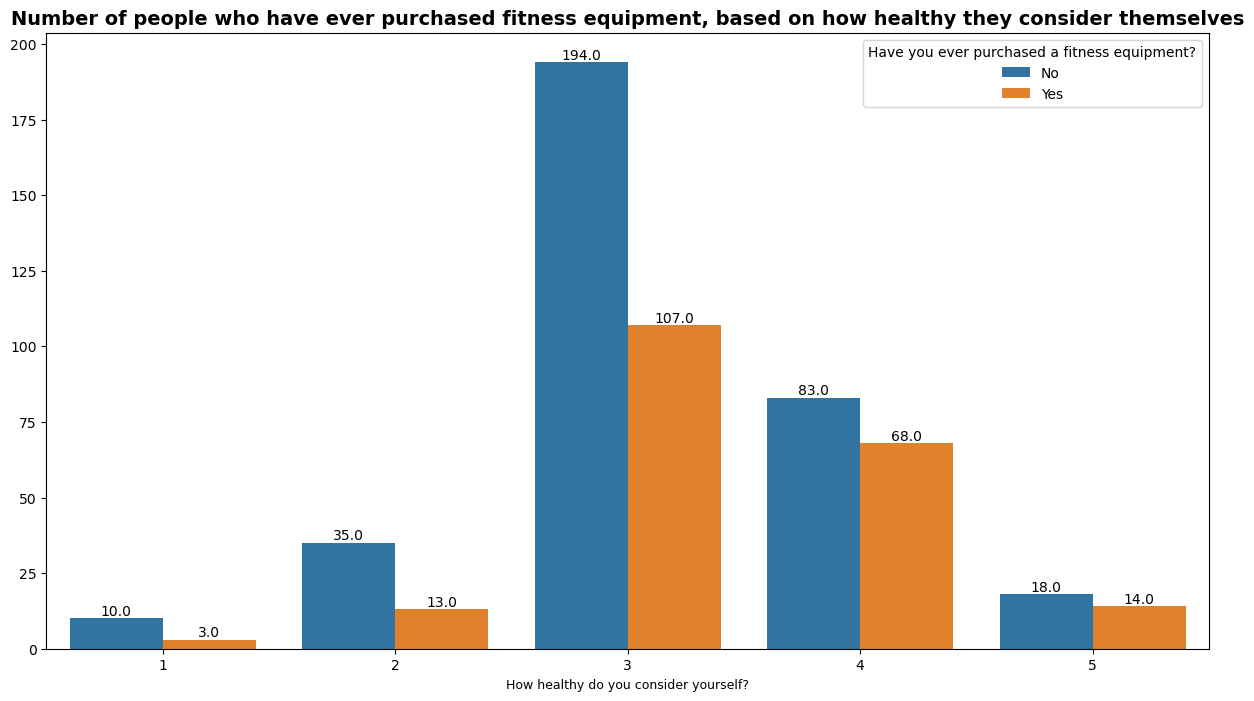

In [14]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x="How healthy do you consider yourself?", hue="Have you ever purchased a fitness equipment?")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Number of people who have ever purchased fitness equipment, based on how healthy they consider themselves', size=14, weight="bold")
plt.xlabel('How healthy do you consider yourself?', fontsize=9)
plt.ylabel('')

<Figure size 1500x500 with 0 Axes>

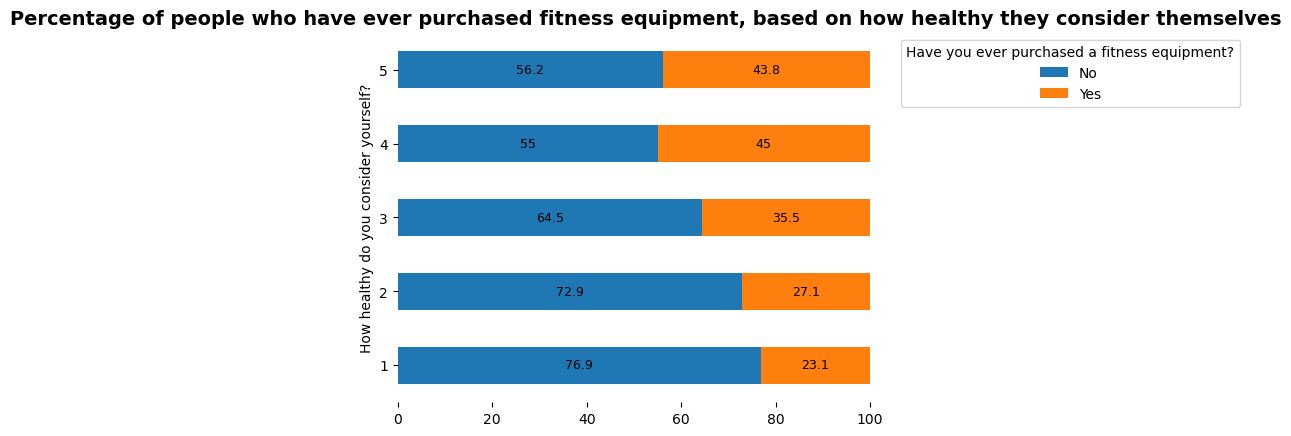

In [15]:
ct = round(pd.crosstab(data["How healthy do you consider yourself?"], data['Have you ever purchased a fitness equipment?'], normalize='index') * 100,1)
plt.figure(figsize=(15, 5))

ax = ct.plot(kind='barh', stacked=True)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='black')
    
plt.ylabel('How healthy do you consider yourself?')
plt.xlabel("")
plt.title('Percentage of people who have ever purchased fitness equipment, based on how healthy they consider themselves', size=14, weight="bold")
plt.legend(title='Have you ever purchased a fitness equipment?', labels=['No', 'Yes'], bbox_to_anchor=(1, 1))

sns.despine(left=True, bottom=True)

<h4 style="line-height: 1.5;">Finally, we aim to predict whether members have ever purchased fitness equipment. We choose two types of machine learning models to solve this problem: Random Forest model and LogisticRegression model.</h4>

<h2>Data Preprocessing</h2>

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Your gender                                                          545 non-null    object
 1   Your age                                                             545 non-null    object
 2   How important is exercise to you ?                                   545 non-null    int64 
 3   How do you describe your current level of fitness ?                  545 non-null    object
 4   How often do you exercise?                                           545 non-null    object
 5   Do you exercise ___________ ?                                        545 non-null    object
 6   What time if the day do you prefer to exercise?                      545 non-null    object
 7   How long do you s

In [17]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 11].values

In [18]:
print("Features (x):")
print(x)
print("\n")
print("Target (y):")
print(y)

Features (x):
[['Female' '19 to 25' 2 ... 'Not always' 3 'Yes']
 ['Female' '19 to 25' 4 ... 'Not always' 4 'Yes']
 ['Female' '15 to 18' 3 ... 'Not always' 4 'Yes']
 ...
 ['Female' '19 to 25' 4 ... 'Not always' 4 'Yes']
 ['Male' '19 to 25' 3 ... 'Not always' 3 'Yes']
 ['Female' '40 and above' 2 ... 'Not always' 3 'No']]


Target (y):
['No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'Ye

<h4 style="line-height: 1.5;">Convert all object variables into numeric variables by using dummy variables for features (x) and LabelEncoder for the target (y).</h4>

In [19]:
from sklearn.preprocessing import LabelEncoder

columns = ['Gender', 'Age', 'Exercise Importance', 'Fitness Level', 'Exercise Frequency', 'Exercise Type', 'Exercise Time', 'Exercise Duration',
           'Balanced Diet', 'Self Health', 'Recommend Exercise']
df_x = pd.DataFrame(x, columns=columns)
x = pd.get_dummies(df_x, drop_first=True).astype(int)    

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

print("Shape (x):")
print(x.shape)
print("\n")
print("Shape (y):")
print(y.shape)
print("\n")
print("Features (x):")
print(x)
print("\n")
print("Target (y):")
print(y)

Shape (x):
(545, 35)


Shape (y):
(545,)


Features (x):
     Gender_Male  Age_19 to 25  Age_26 to 30  Age_30 to 40  Age_40 and above  \
0              0             1             0             0                 0   
1              0             1             0             0                 0   
2              0             0             0             0                 0   
3              0             0             0             0                 0   
4              0             1             0             0                 0   
..           ...           ...           ...           ...               ...   
540            0             0             0             0                 1   
541            0             0             0             0                 1   
542            0             1             0             0                 0   
543            1             1             0             0                 0   
544            0             0             0             0     

<h4 style="line-height: 1.5;">Split dataset into 70% training set and 30% test set</h4>

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

<h2> Model Training</h2>
<h4>Random Forest model</h4>

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0) 

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


<h4>LogisticRegression model</h4>

In [22]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

<h4>Support Vector Classification</h4>

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print("\n")
print(grid.best_params_)  

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

In [24]:
svcmodel = SVC(kernel='rbf', C=1, gamma=1)  
svcmodel.fit(X_train, y_train)

SVC(C=1, gamma=1)

<h2>Predictions and Evaluation</h2> 

<h4>Random Forest model</h4>

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = best_rf.predict(X_test)

print("Random Forest model:")
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Random Forest model:


              precision    recall  f1-score   support

           0       0.68      0.89      0.77       105
           1       0.57      0.27      0.37        59

    accuracy                           0.66       164
   macro avg       0.63      0.58      0.57       164
weighted avg       0.64      0.66      0.63       164



[[93 12]
 [43 16]]


<h4>LogisticRegression model</h4>

In [26]:
predictions = logmodel.predict(X_test)

print("LogisticRegression model:")
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

LogisticRegression model:


              precision    recall  f1-score   support

           0       0.67      0.84      0.74       105
           1       0.47      0.25      0.33        59

    accuracy                           0.63       164
   macro avg       0.57      0.55      0.54       164
weighted avg       0.60      0.63      0.59       164



[[88 17]
 [44 15]]


<h4>Support Vector Classification model</h4>

In [27]:
predictions = svcmodel.predict(X_test)

print("LogisticRegression model:")
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

LogisticRegression model:


              precision    recall  f1-score   support

           0       0.65      0.97      0.78       105
           1       0.50      0.05      0.09        59

    accuracy                           0.64       164
   macro avg       0.57      0.51      0.43       164
weighted avg       0.59      0.64      0.53       164



[[102   3]
 [ 56   3]]


<h2>Summary</h2>

#### Random Forest model

- **Accuracy**: 68%
- **Precision (Purchase Prediction)**: 65%
- **Recall (Identifying Actual Purchase)**: 60%
- **F1-Score (Balance of Precision and Recall)**: 60%

#### LogisticRegression model

- **Accuracy**: 63%
- **Precision (Purchase Prediction)**: 57%
- **Recall (Identifying Actual Purchase)**: 55%
- **F1-Score (Balance of Precision and Recall)**: 54%

#### Support Vector Classification model

- **Accuracy**: 64%
- **Precision (Purchase Prediction)**: 57%
- **Recall (Identifying Actual Purchase)**: 51%
- **F1-Score (Balance of Precision and Recall)**: 43%